In [65]:
from sklearn import *
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import preprocessing
from matplotlib import style
style.use('ggplot')

In [66]:
sys.path.append('../utilities/')
from utils import *

In [67]:
dat = pd.read_csv('../CSVData/04.13.2019vsUVAGM2.csv')

In [68]:
dat.columns

Index(['#', 'Name', 'ClipType', 'Media In', 'Media Out', 'Hit Location X',
       'Hit Location Y', 'Hit Location', 'Hit Result', 'At Bat Pitch Count',
       'Batter', 'Bunt', 'Count', 'Inning', 'Outs', 'Pitch Location X',
       'Pitch Location Y', 'RBI', 'Total Pitch Count', 'Umpire', 'Strike Type',
       'Pitcher', 'Home Score', 'Home Team', 'Hit Type', 'Batter Strength',
       'Away Team', 'Ball Type', 'Base', 'Pitch Count', 'Pitch Type',
       'Team in Field', 'Team at Bat', 'Visitor Score'],
      dtype='object')

In [69]:
testDat = subset(dat, ['Pitch Location X', 'Pitch Location Y', 'Strike Type', 'Ball Type', 'Umpire'])
testDat['Result'] = testDat['Strike Type']
testDat['Result'].fillna("Ball", inplace = True) 

In [70]:
frame = testDat[testDat.Result.isin(['Take', 'Ball'])].copy()
frame['Result'].replace('Take', 1.0, inplace = True)
frame['Result'].replace('Ball', -1.0, inplace = True)
vec = np.array(subset(frame, ['Pitch Location X', 'Pitch Location Y']))

,Pitch Location X,Pitch Location Y,Strike Type,Ball Type,Umpire,Result
0,51,97,Take,NaN,NaN,1.0
1,46,76,Take,NaN,NaN,1.0
2,35,127,NaN,Ball,NaN,-1.0
6,67,96,Take,NaN,NaN,1.0
7,41,1,NaN,Ball,NaN,-1.0
...,...,...,...,...,...,...
214,212,212,NaN,Ball,NaN,-1.0
216,16,114,NaN,Ball,NaN,-1.0
218,210,91,NaN,Ball,NaN,-1.0
219,65,165,Take,NaN,NaN,1.0


In [245]:
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(vec, frame.Result)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [247]:
clf = svm.SVC(gamma='scale', cache_size=7000, kernel='rbf')

In [248]:
clf.fit(vec, frame.Result)

SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [249]:
clf.predict(vec)

array([ 1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1.])

In [250]:
np.array(frame.Result)

array([ 1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,
       -1.,  1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
       -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
       -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1.,  1., -1.])

In [251]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = [-10, 240]
    ylim = [250, -10]
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='purple',
               levels=[0], alpha=0.6,
               linestyles=['-'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.hlines(y=50, xmin=60, xmax=185, linewidth=2, color='g', alpha = 0.3)
    ax.hlines(y=190, xmin=60, xmax=185, linewidth=2, color='g', alpha = 0.3)
    ax.vlines(x=60, ymin=50, ymax=190, linewidth=2, color='g', alpha = 0.3)
    ax.vlines(x=185, ymin=50, ymax=190, linewidth=2, color='g', alpha = 0.3)

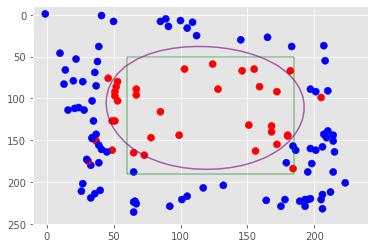

In [252]:
plt.scatter(vec[:, 0], vec[:, 1], c=label, s=50, cmap='bwr')
plot_svc_decision_function(clf)

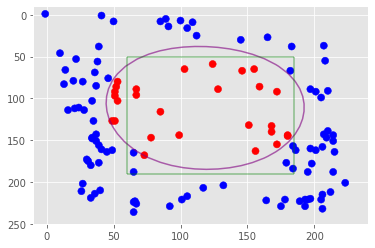

In [253]:
preds = clf.predict(vec)
plt.scatter(vec[:, 0], vec[:, 1], c=preds, s=50, cmap='bwr')
plot_svc_decision_function(clf)

In [71]:
locs = pd.read_csv('../../PyTorch-YOLOv3/detect/output.csv', sep = " ", header = None)

In [72]:
locs.columns = ['x', 'y', 'x1', 'y1', 'x4', 'y4']
len(locs)
locs.x = locs.x + 60
locs.y = locs.y + 50

In [77]:
yuh = locs[43:44]

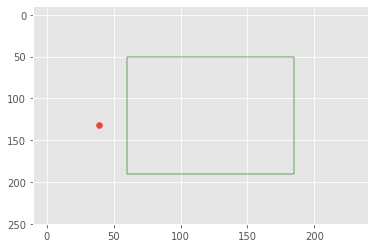

In [78]:
plt.scatter(yuh.x, yuh.y)
plt.xlim(-10, 240)
plt.ylim(250, -10)

plt.hlines(y=50, xmin=60, xmax=185, linewidth=2, color='g', alpha = 0.3)
plt.hlines(y=190, xmin=60, xmax=185, linewidth=2, color='g', alpha = 0.3)
plt.vlines(x=60, ymin=50, ymax=190, linewidth=2, color='g', alpha = 0.3)
plt.vlines(x=185, ymin=50, ymax=190, linewidth=2, color='g', alpha = 0.3)
#plt.hlines(y=59, xmin=80, xmax=166, linewidth=2, color='g', alpha = 0.3)
#plt.hlines(y=178, xmin=80, xmax=166, linewidth=2, color='g', alpha = 0.3)
#plt.vlines(x=80, ymin=59, ymax=178, linewidth=2, color='g', alpha = 0.3)
#plt.vlines(x=166, ymin=59, ymax=178, linewidth=2, color='g', alpha = 0.3)